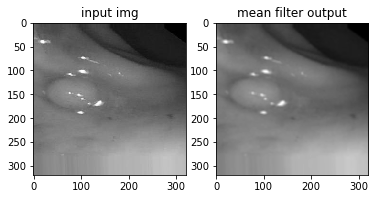

In [80]:
# Author: Qinghui Liu, for my master thesis project, 
# Date: 2017-03
# basic image processing and analysis by python 

# ####1. Spatial Filters - linear filters and non-linear filters ####
# linear ones include mean, laplacian, and laplacian of gaussian
# non-linear ones include median, maximum, minimum, sobel, prewitt and canny
# Four padding approaches: Zero padding, constant, nearest neighbor and reflect paddings. 
# ---mean filter
import numpy as np
import skimage
import skimage.io as sio
import scipy.ndimage as sn
from scipy.misc.pilutil import Image
from matplotlib import pyplot
#import matplotlib.pyplot as plt

# plotting inline in Jupter Notebook
%matplotlib inline
#matplotlib.rcParams['font.size'] = 8

# open image and convert it to grayscale
img_dir = '/Users/liuqh/Desktop/keras/data/train/polyp/_0_1452.jpeg'
#a = Image.open(img_dir).convert('L')
a = sio.imread(img_dir)
a = skimage.color.rgb2gray(a)
pyplot.subplot(1,2,1)
pyplot.title('input img')
pyplot.imshow(a,cmap='gray')

# initializeing the filter of size 5x5
# divided by 25 for normalization
k = np.ones((5,5))/25

# perform convolution
b = sn.filters.convolve(a,k)

pyplot.subplot(1,2,2)
pyplot.imshow(b,cmap='gray') # try cmap = 'bone_r' or other parameters
pyplot.title('mean filter output')
pyplot.show()
# convert ndarray to an image
b = scipy.misc.toimage(b) 
b.save('mean_output.png')



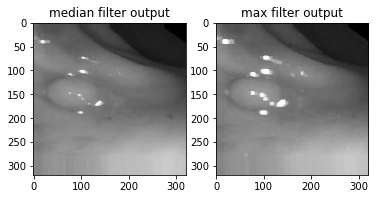

In [43]:
### Median Filter
# median filter - one popular non-linear filter
b_median = scipy.ndimage.filters.median_filter(a, size=5, footprint=None, output=None,
                                              mode ='reflect', cval=0.0, origin=0)

b_median = scipy.misc.toimage(b_median)
pyplot.subplot(1,2,1)
pyplot.imshow(b_median,'gray')
pyplot.title('median filter output')

b_median.save('b_median.png')

### Max Filter
# this filter enhances the bright points

b_max = sn.filters.maximum_filter(a, size=5, 
                                  footprint=None,
                                  output=None,
                                  mode ='reflect', 
                                  cval=0.0, origin=0)
b_max = scipy.misc.toimage(b_max)
pyplot.subplot(1,2,2)
pyplot.imshow(b_max,'gray')
pyplot.title('max filter output')
b_max.save('b_max.png')


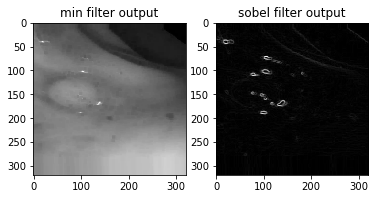

In [69]:
### Min Filter
# this filter enhances the darkest points

b_min = sn.filters.minimum_filter(a, size=5, 
                                  footprint=None,
                                  output=None,
                                  mode ='reflect',
                                  cval=0.0, origin=0)
b_min = scipy.misc.toimage(b_min)
pyplot.subplot(1,2,1)
pyplot.imshow(b_min,'gray')
pyplot.title('min filter output')
b_min.save('b_min.png')

### Edge detection
# Sobel, and Prewitt filters are used to enchance all edges
# horizontal or vertical - sobel or prewitt just enhance all vertical or horizontal endges

from skimage import filter
b_edge = filter.sobel(a) # try to use sobel_v(a) or sobel_h(a) 
pyplot.subplot(1,2,2)
pyplot.imshow(b_edge,'gray')
pyplot.title('sobel filter output')

b_edge = scipy.misc.toimage(b_edge)
b_edge.save('b_edge.png')

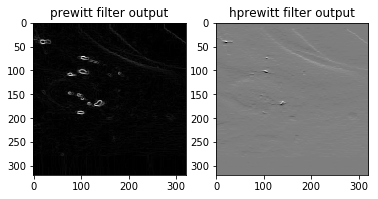

In [57]:
# prewitt and hprewitt filters

b_prewitt = filter.prewitt(a,mask = None)
pyplot.subplot(1,2,1)
pyplot.imshow(b_prewitt,'gray')
pyplot.title('prewitt filter output')

b_prewitt = scipy.misc.toimage(b_prewitt)
b_prewitt.save('b_prewitt.png')

b_hprewitt = filter.prewitt_h(b_min,mask = None)
pyplot.subplot(1,2,2)
pyplot.imshow(b_hprewitt,'gray')
pyplot.title('hprewitt filter output')

b_hprewitt = scipy.misc.toimage(b_hprewitt)
b_hprewitt.save('b_hprewitt.png')

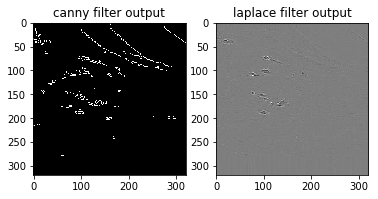

In [78]:
# canny and laplace filters
b_canny = skimage.feature.canny(a, sigma=0.1)
pyplot.subplot(1,2,1)
pyplot.imshow(b_canny,'gray')
pyplot.title('canny filter output')

b_canny = scipy.misc.toimage(b_canny)
b_canny.save('b_canny.png')

#b_laplace = skimage.filters.laplace(a,ksize = 3)
b_laplace = sn.filters.laplace(a,mode='reflect')
pyplot.subplot(1,2,2)
pyplot.imshow(b_laplace,'gray')
pyplot.title('laplace filter output')

b_laplace = scipy.misc.toimage(b_laplace)
b_laplace.save('b_laplace.png')

In [87]:
# Histogram Equalization
# refer to link: http://scikit-image.org/docs/dev/auto_examples

from skimage import data, img_as_float
from skimage import exposure

def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    img = img_as_float(img)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap='gray')
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf



In [88]:
img = a

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)



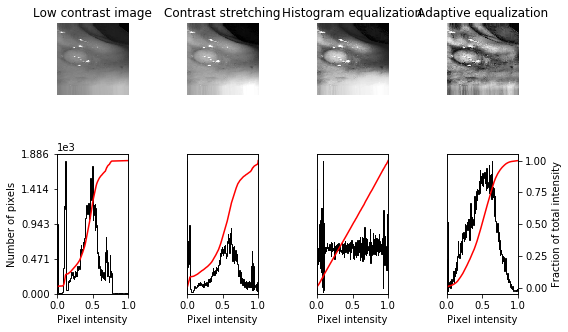

In [89]:
# Display results
fig = pyplot.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
pyplot.show()